In [147]:
import numpy as np
import cv2 as cv
import os
import glob
from PIL import Image as im
from matplotlib import pyplot as plt
import random

from skimage import io

plt.rcParams['figure.figsize'] = [10, 10]

def visualize_filter(frames,frames_sobel,frames_adj,index):
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))
    axes[0].imshow(frames[index])
    axes[0].set_title("originak")
    axes[1].imshow(frames_sobel[index])
    axes[1].set_title("sobel")
    axes[2].imshow(frames_adj[index])
    axes[2].set_title("filtered")


In [148]:
if os.path.isdir('frames'):
    files = os.listdir('frames')
    print(files)
    for f in files:
        os.remove("frames/"+f)
else:
    os.mkdir("frames")

['88_mario_2.tiff', '55_mario_3.tiff', '32_cass_1.tiff', '52_mario_3.tiff', '47_mario_3.tiff', '16_mario_1.tiff', '40_mario_3.tiff', '12_cass_2.tiff', '76_mario_3.tiff', '71_mario_3.tiff', '27_cass_1.tiff', '6_cass_2.tiff', '95_ryan_1.tiff', '64_mario_3.tiff', '63_mario_3.tiff', '36_mario_3.tiff', '41_mario_3.tiff', '17_mario_1.tiff', '46_mario_3.tiff', '89_mario_2.tiff', '53_mario_3.tiff', '22_cass_1.tiff', '3_cass_2.tiff', '54_mario_3.tiff', '37_mario_3.tiff', '62_mario_3.tiff', '19_cass_1.tiff', '65_mario_3.tiff', '99_ryan_1.tiff', '70_mario_3.tiff', '77_mario_3.tiff', '9_cass_2.tiff', '28_cass_1.tiff', '100_ryan_1.tiff', '34_cass_1.tiff', '68_mario_3.tiff', '21_cass_1.tiff', '83_mario_2.tiff', '84_mario_2.tiff', '93_ryan_1.tiff', '59_mario_3.tiff', '14_cass_2.tiff', '96_ryan_1.tiff', '69_mario_3.tiff', '24_cass_1.tiff', '5_cass_2.tiff', '11_cass_2.tiff', '90_mario_2.tiff', '85_mario_2.tiff', '82_mario_2.tiff', '31_cass_1.tiff', '58_mario_3.tiff', '39_mario_3.tiff', '98_ryan_1.tiff'

In [150]:
# This cell is for getting a set of frames from the provided video data 
#(192, 1080, 634, 3)
# frame shape (1080, 634, 3)

frames = [] #np.zeros((192, 1080, 634, 3))
names = [] 
count = 0

for filename in os.listdir("scans"):
    vid = cv.VideoCapture("scans/"+filename)
    
    while(vid.isOpened()):
        ret, frame = vid.read()
        if not ret:
            vid.release()
            cv.destroyAllWindows()
            break
        if(count % 2 == 0):
            
            frames.append(frame)
            #np.insert(frames,count,frame)
            names.append( filename.partition("_")[2].partition(".")[0]) 
           
        count += 1


print("count: ", count, " frames")
print(type(frames),type(ret))
print(np.shape(frames))
print(names)
    

OpenCV: Couldn't read video stream from file "scans/.DS_Store"
[ERROR:0@440114.772] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): scans/.DS_Store in function 'icvExtractPattern'




count:  690  frames
<class 'list'> <class 'bool'>
(345, 1080, 634, 3)
['cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'cass_2', 'mario_1', 'mario_1', 'mario_1', 'mario_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'cass_1', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_3', 'mario_2', 'mario_2', 'mario_2', 'mario_2', 'mario_2', 'mario_2', 'mario_2', 'mario_2', 'mario_2', 'ma

In [155]:

if os.path.isdir('frames'):
    files = os.listdir('frames')
    print(files)
    for f in files:
        os.remove("frames/"+f)   
else:
    os.mkdir("frames")

if os.path.isdir('filtered_frames'):
    files = os.listdir('filtered_frames')
    print(files)
for f in files:
    os.remove("filtered_frames/"+f)   
#else:
#    os.mkdir("filtered_frames")

# This cell has the image processing code 
# images are saved in an 3 dimesnional array of shape (1080,634,3) 
# the operations below crop the 

cropV = (30,595)
cropH = (130,620)
width = cropH[1] - cropH[0]
height = cropV[1] - cropV[0]
#width = 128
#height = 128
width = 256
height = 256


count = 1
frames_resized = []
frames_adj = []

frames_sobel = []

print("frames:" + str(np.shape(frames)))
print("frame:" + str(np.shape(frames[0])))

def alpha(depth):
    a = depth/70
    return a

def custom_contrast(frame):
    #frame = cv.GaussianBlur(frame,(3,3),cv.BORDER_DEFAULT)
    mean = np.mean(frame)
    print("medi:" +str(mean))
    new_image = np.zeros(frame.shape, frame.dtype)
    for y in range(frame.shape[0]):
        for x in range(frame.shape[1]):
            for c in range(frame.shape[2]):
                val = frame[y,x,c]
                if val < mean + mean * alpha(y):
                    new_image[y,x,c] = 0
                else:
                    new_image[y,x,c] = frame[y,x,c]
    return new_image

def sobolxcontrast(sobol_mask,frame):
    for y in range(1,frame.shape[0]):
        for x in range(frame.shape[1]):
            for c in range(frame.shape[2]):
                if sobol_mask[y,x,c] != 0:
                    new_image[y,x,c] = frame[y-1,x,c]
    return new_image

def canny(frame):
    return cv.Canny(image=frame, threshold1=150, threshold2=200)
   
def sobol_contrast(frame):
    
    #frame = cv.Sobel(src=frame, ddepth=cv.CV_64F, dx=0, dy=1, ksize=7,borderType=cv.BORDER_CONSTANT)  # y direction sensitivity
    #kernel = np.ones((3,3),np.uint8)
    #return frame #cv.erode(frame,kernel,iterations = 1)

    sobelx = cv.Sobel(src=frame, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv.Sobel(src=frame, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    return cv.Sobel(src=frame, ddepth=cv.CV_64F, dx=0, dy=1, ksize=31) 

# =================

# make sure to change back to all frames after testing
for x in range(0,len(frames)):    
    #crop to square and resize to 128 * 128
    frame = frames[x][cropH[0]:cropH[1],cropV[0]:cropV[1]]
    down_points = (width, height)
    frame = cv.resize(frame, down_points, interpolation= cv.INTER_LINEAR)
    
    frames_resized.append(frame)


for x in range(0,len(frames_resized)):  # change this back to len(frames)

    frame = frames_resized[x]
    img_grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    #new_image =sobol_contrast(frame)
    #new_image =  custom_contrast(frame)
    #new_image = thresh(frame)
    #new_sobel = sobol_contrast(frame)
    new_image = cv.normalize(frame, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

    new_sobel = canny(frame)

    frames_adj.append(new_image)
    frames_sobel.append(new_sobel)

    cv.imwrite("frames/"+ str(count) +"_" + names[x]+".tiff", frame)
    cv.imwrite("filtered_frames/"+ str(count) +"_" + names[x]+".tiff", new_image)
    count += 1

print(np.unique(frames_adj[3]))
 


['88_mario_2.tiff', '55_mario_3.tiff', '32_cass_1.tiff', '52_mario_3.tiff', '47_mario_3.tiff', '16_mario_1.tiff', '40_mario_3.tiff', '12_cass_2.tiff', '76_mario_3.tiff', '71_mario_3.tiff', '27_cass_1.tiff', '6_cass_2.tiff', '95_ryan_1.tiff', '64_mario_3.tiff', '63_mario_3.tiff', '36_mario_3.tiff', '41_mario_3.tiff', '17_mario_1.tiff', '46_mario_3.tiff', '89_mario_2.tiff', '53_mario_3.tiff', '22_cass_1.tiff', '3_cass_2.tiff', '54_mario_3.tiff', '37_mario_3.tiff', '62_mario_3.tiff', '19_cass_1.tiff', '65_mario_3.tiff', '99_ryan_1.tiff', '70_mario_3.tiff', '77_mario_3.tiff', '9_cass_2.tiff', '28_cass_1.tiff', '100_ryan_1.tiff', '34_cass_1.tiff', '68_mario_3.tiff', '21_cass_1.tiff', '83_mario_2.tiff', '84_mario_2.tiff', '93_ryan_1.tiff', '59_mario_3.tiff', '14_cass_2.tiff', '96_ryan_1.tiff', '69_mario_3.tiff', '24_cass_1.tiff', '5_cass_2.tiff', '11_cass_2.tiff', '90_mario_2.tiff', '85_mario_2.tiff', '82_mario_2.tiff', '31_cass_1.tiff', '58_mario_3.tiff', '39_mario_3.tiff', '98_ryan_1.tiff'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10


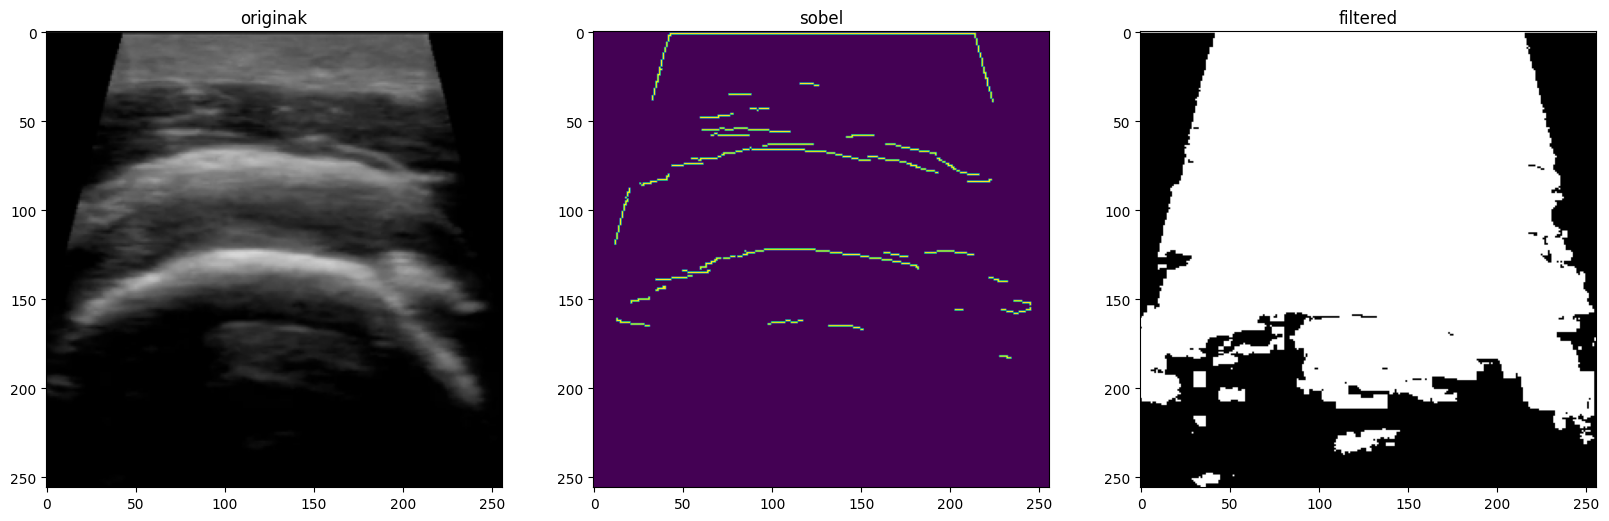

In [152]:
random_index = random.randint(0, len(frames_adj) - 1)
random_index = 10
print(random_index)
visualize_filter(frames_resized,frames_sobel,frames_adj,random_index)
#plt.subplot(231),plt.imshow(frames_sobel[random_index],'gray'),plt.title("sobel")
#print(np.unique(frames_resized))


(<Axes: >, <matplotlib.image.AxesImage at 0x147d058d0>)

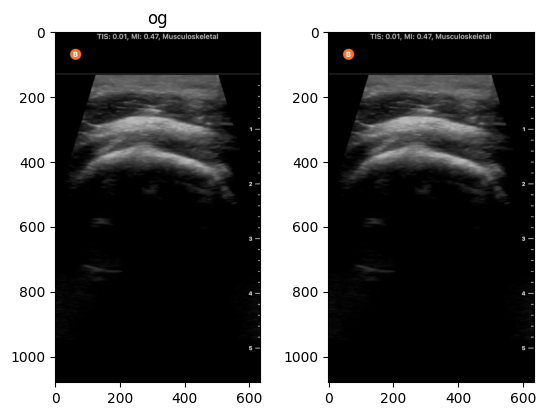

In [62]:

#frames[1] = frames[0][110:800,30:598] 

plt.subplot(231),plt.imshow(frames[0],'gray'),plt.title("og")
plt.subplot(232),plt.imshow(frames[0],'gray')

In [49]:
print(os.listdir("samplemask"))
print(open('samplemask/100_cass_4_background.tiff', 'rb').read(5))

path ='samplemask/100_cass_4_spra.ome.tiff'

import tifffile as tiff

test_mask = io.imread(path)

plt.imshow(test_mask)



['.DS_Store', '100_cass_4_background.tiff', '100_cass_4_skinfat.ome.tiff', '100_cass_4_spra.ome.tiff', '100_cass_4_delt.ome.tiff']
b'II*\x00\x9a'


ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

numpy.ndarray